## REFERENCES
### PROBLEM
  - https://www.kaggle.com/c/cat-in-the-dat

### EDA
  - https://www.kaggle.com/kabure/eda-feat-engineering-encode-conquer
  - https://www.kaggle.com/werooring/ch7-eda

### BASELINE
  - https://www.kaggle.com/werooring/ch7-baseline

### MODEL MODIFIED
  - https://www.kaggle.com/werooring/ch7-modeling
  - https://www.kaggle.com/werooring/ch7-modeling2

### SETTING 
  - https://www.kaggle.com/werooring/ch7-notebook

#### KEYWORDs
  - TYPE: binary classification
  - SCORING: ROC AUC  
  - EDA: feature summary, distribution, binary/nomial/ordinal/date data
  - MODEL: logistic regression
  - FE: one hot encoding, scaling

# DATA
- Categorical Data: Nomial, Ordinal, Binomial, Date

In [26]:
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import scipy

import os
import re

In [27]:
# list(filter(lambda x: 'path' in x, dir(os)))
# list(filter(lambda x: re.search(r'path', x), dir(os)))

In [28]:
data_path = '/Users/mori/GIT/forLightman/Transcription/TranscriptingMLDL/002cat-feature-encoding/data'
train = pd.read_csv(os.path.join(data_path, 'train.csv'), index_col='id')
test = pd.read_csv(os.path.join(data_path, 'test.csv'), index_col='id')
submission = pd.read_csv(os.path.join(data_path, 'sample_submission.csv'), index_col='id')

In [29]:
train.shape, test.shape

((300000, 24), (200000, 23))

In [4]:
train.head().T

id,0,1,2,3,4
bin_0,0,0,0,0,0
bin_1,0,1,0,1,0
bin_2,0,0,0,0,0
bin_3,T,T,F,F,F
bin_4,Y,Y,Y,Y,N
nom_0,Green,Green,Blue,Red,Red
nom_1,Triangle,Trapezoid,Trapezoid,Trapezoid,Trapezoid
nom_2,Snake,Hamster,Lion,Snake,Lion
nom_3,Finland,Russia,Russia,Canada,Canada
nom_4,Bassoon,Piano,Theremin,Oboe,Oboe


In [5]:
submission.head()

,target
id,
300000,0.5
300001,0.5
300002,0.5
300003,0.5
300004,0.5


# EDA
- PROCESS: 
  - `LOOK AROUND DATA`: FEATRUE SUMMARY → `VISUALIZATION`: TARGET DISTRIBUTION, EXPLAIN VAR DISTRIBUTION → `SUMMARY` & `MODELING STRATEGY`

## FEATURE SUMMARY
- FEATURE TYPE
- MISSING VALUES
- UNIQUE VALUES
- REAL INPUT VALUES

In [6]:
def resumetable(df):
    print(f'Dataset Shape: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['DataType'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index':'feature'})
    summary['n_missing_values'] = df.isnull().sum().values
    summary['n_unique_values'] = df.nunique().values
    summary['first_value'] = df.loc[0].values               #get row
    summary['second_value'] = df.loc[1].values
    summary['third_value'] = df.loc[2].values
    return summary
resumetable(train)

Dataset Shape: (300000, 24)


,feature,DataType,n_missing_values,n_unique_values,first_value,second_value,third_value
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,Y,Y
5,nom_0,object,0,3,Green,Green,Blue
6,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
7,nom_2,object,0,6,Snake,Hamster,Lion
8,nom_3,object,0,6,Finland,Russia,Russia
9,nom_4,object,0,4,Bassoon,Piano,Theremin


- CHECK
  - bin0 ~ bin4
    - no missing value
    - 2 for each var
    - in case of object type(bin_3, bin_4), encoding to number
  - nom_0 ~ nom_9: What kind of values it has?
  - ord_0 ~ ord_5: Keep the **ordinarity** in mind!
    - ord_0: 1, 2, 3
    - ord_1: 'Novice' 'Contributor' 'Expert' 'Master' 'Grandmaster'
    - ord_2: 'Freezing' 'Cold' 'Warm' 'Hot' 'Boiling Hot' 'Lava Hot'
    - ord_3~6: alphabetical order
  - day, month, year

- Figure out **Ordinarity** in Ordinal features

In [7]:
for i in range(3):
    feature = 'ord_' + str(i)
    print(f'unique value of {feature} : {train[feature].unique()}')

unique value of ord_0 : [2 1 3]
unique value of ord_1 : ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
unique value of ord_2 : ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


In [8]:
for i in range(3,6):
    feature = 'ord_' + str(i)
    print(f'unique value of {feature} : {train[feature].unique()}')
# alphabetical order

unique value of ord_3 : ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
unique value of ord_4 : ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
unique value of ord_5 : ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 'dN' 'us' 'dZ' 'yN' 'Nf' 'QM' 'jV' 'sY' 'wu' 'SB'
 'UO' 'Mx' 'JX' 'Ry' 'Uk' 'uJ' 'LE' 'ps' 'kE' 'MO

In [9]:
for x in ('day', 'month', 'target'):
    print(f'unique value of {x}: {train[x].unique()}')

unique value of day: [2 7 5 4 3 1 6]
unique value of month: [ 2  8  1  4 10  3  7  9 12 11  5  6]
unique value of target: [0 1]




---
- DAY 1 CLOSED: ON EDA, WE HAVE TO CHECK BELOW LIST
  - TYPE
  - MISSING VALUES 
  - UNIQUE VALUES(NUM, REAL VALUES)
  - REAL INPUT VALUES → how to encoding

# Data Visualization

In [11]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## Target Distribution

Text(0.5, 1.0, 'Target Distribution')

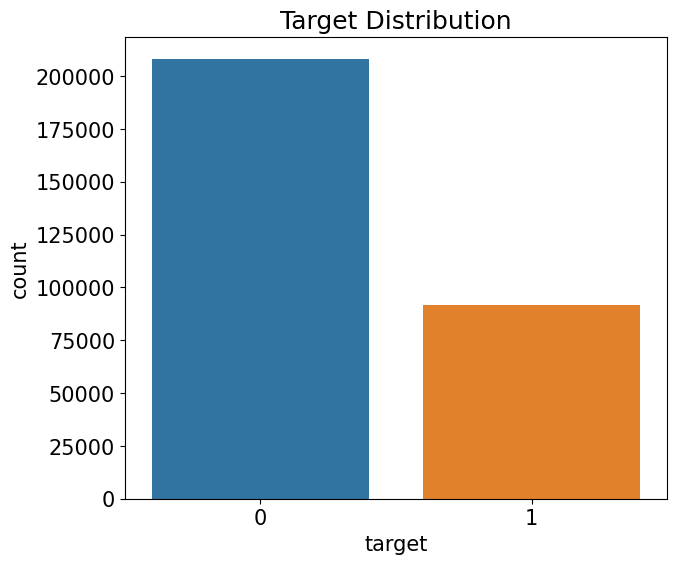

In [12]:
#Distribution of Categorical Data: COUNTPLOT
mpl.rc('font', size = 15)
plt.figure(figsize = (7, 6))
ax = sns.countplot(x='target', data=train)
ax.set_title('Target Distribution')

- Let's see what properties the rectangle has

In [13]:
rentangle = ax.patches[0]
print('Height: ', rentangle.get_height())
print('Width: ', rentangle.get_width())
print('Position of X axis: ', rentangle.get_x())

Height:  208236.0
Width:  0.8
Position of X axis:  -0.4


- Write Percentage over each Patches

Text(0.5, 1.0, 'Target Distribution')

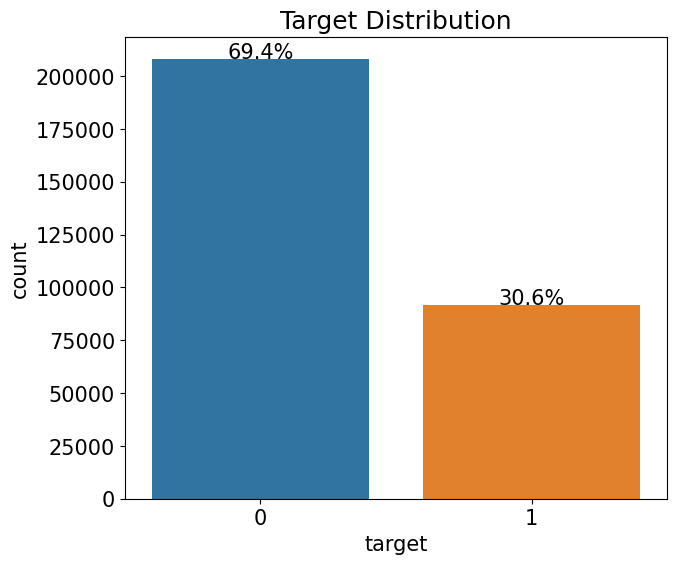

In [14]:
def write_percent(ax, total_size):
    '''
    Write percentage(height over total size) over each patches
    '''
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height/total_size*100

        ax.text(
            x=left_coord+width/2.0
            , y = height + total_size*0.001
            , s=f'{percent:1.1f}%' #string
            , ha = 'center' #horizontal alignment
            )
plt.figure(figsize=(7,6))
ax = sns.countplot(x='target', data = train)
write_percent(ax,len(train))
ax.set_title('Target Distribution')

## Target Distribution Given Binomial Featrues

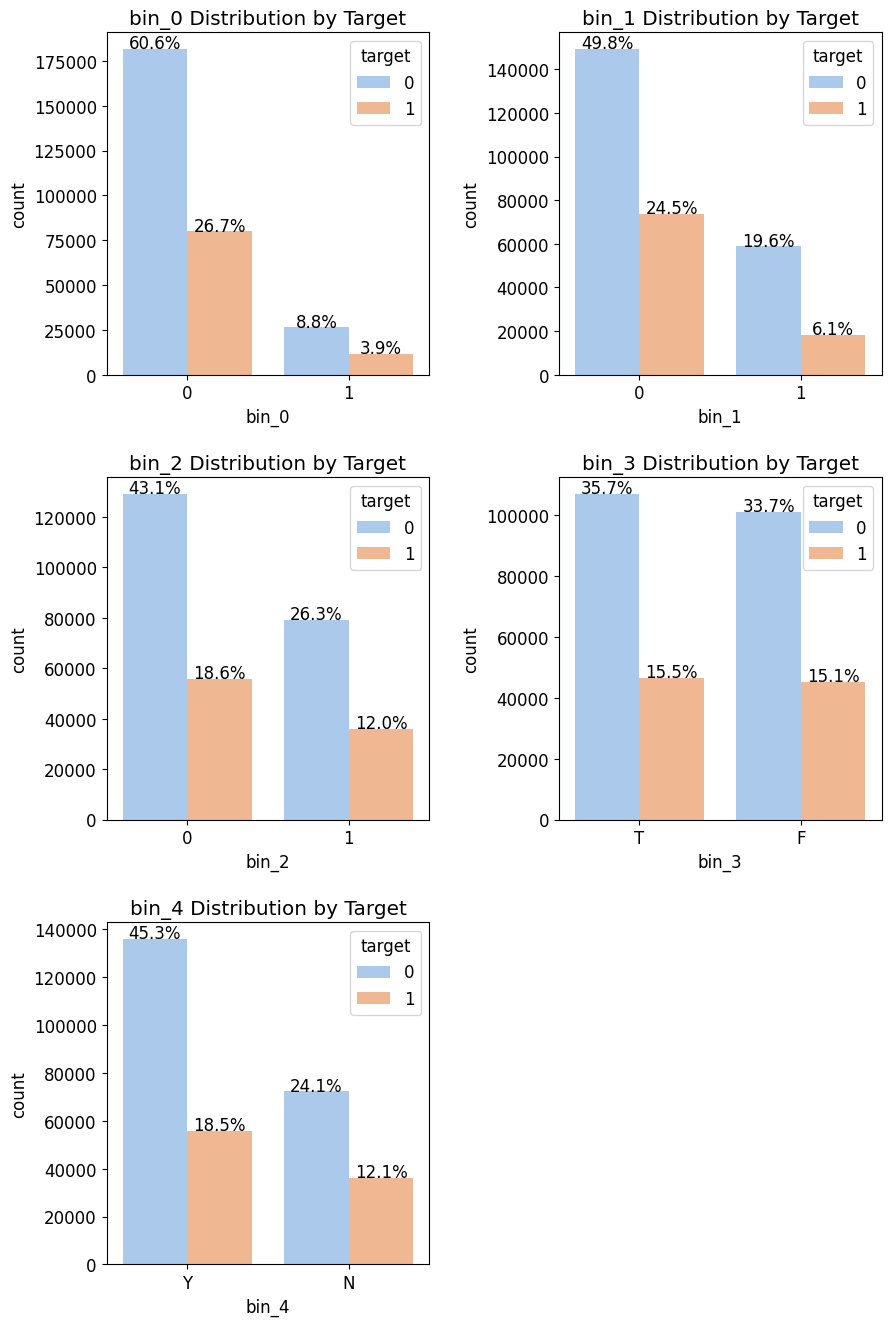

In [15]:
import matplotlib.gridspec as gridspec

mpl.rc('font', size = 12)
grid = gridspec.GridSpec(3,2)
plt.figure(figsize=(10, 16))
plt.subplots_adjust(wspace=0.4, hspace=0.3)
# plt.tight_layout()

bin_features = [
    'bin_0'
    , 'bin_1'
    , 'bin_2'
    , 'bin_3'
    , 'bin_4'
]

for idx, feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx])

    sns.countplot(x = feature
                , data = train
                , hue = 'target'
                , palette='pastel'
                , ax = ax)
    ax.set_title(f'{feature} Distribution by Target')
    write_percent(ax, len(train))

## Target Distribution According to Nomial Featrues
- DAY 2 STARTED
### Fundamental Skills for Analysis
- The variable that makes different distributions has **predictive power** for the target value.
- Nomial Featrues → One-Hot Encoding

### Data Visualization for Nomial (explain) Features

#### 1. Make a Cross Tabulation generation function
- Cross Tabulation: Table for Comparison of two categorical variables. It will be used to draw point plot.

In [16]:
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['target'], normalize='index') * 100
    crosstab = crosstab.reset_index() # featrue to col name
    return crosstab
get_crosstab(train, 'nom_0')[1]

0    24.179024
1    32.714522
2    35.105173
Name: 1, dtype: float64

#### 2. Make a Point Plot generation function

In [17]:
get_crosstab(train, 'nom_0')

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [18]:
def plot_pointplot(ax, feature, crosstab):
    '''
    Plot a pointplot of the given feature and crosstab over countplot of an explain variable.
    - ax: axis that is used to plot the pointplot
    - feature: feature to plot on pointplot
    - crosstab
    '''
    # Create a new axis that shares the x-axis and does not share the y-axis
    ax2 = ax.twinx()
    # Draw Point Plot on new axis
    ax2 = sns.pointplot( x = feature
                        , y = 1
                        , data=crosstab
                        , order = crosstab[feature].values
                        , color='black'
                        )
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1)
    ax2.set_ylabel('Target 1 Ratio(%)')

#### 3. Make Feature Distribution and Point Plot generation functions

In [21]:
import matplotlib.gridspec as gridspec

def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, size=(30, 20)):
    '''
    Apply the functions that We've made above to draw plots with countplot and pointplot
    '''
    plt.figure(figsize=size)
    grid = gridspec.GridSpec(num_rows, num_cols)
    plt.subplots_adjust(wspace=0.45, hspace=0.3) # space setting

    for idx, feature in enumerate(features):
        crosstab = get_crosstab(df, feature)
        ax = plt.subplot(grid[idx])

        sns.countplot(x = feature
                    , data = df
                    , order = crosstab[feature].values
                    , color = 'skyblue'
                    , ax = ax)
        write_percent(ax, len(df))

        plot_pointplot(ax, feature, crosstab)
        
        ax.set_title(f'{feature} Distribution')

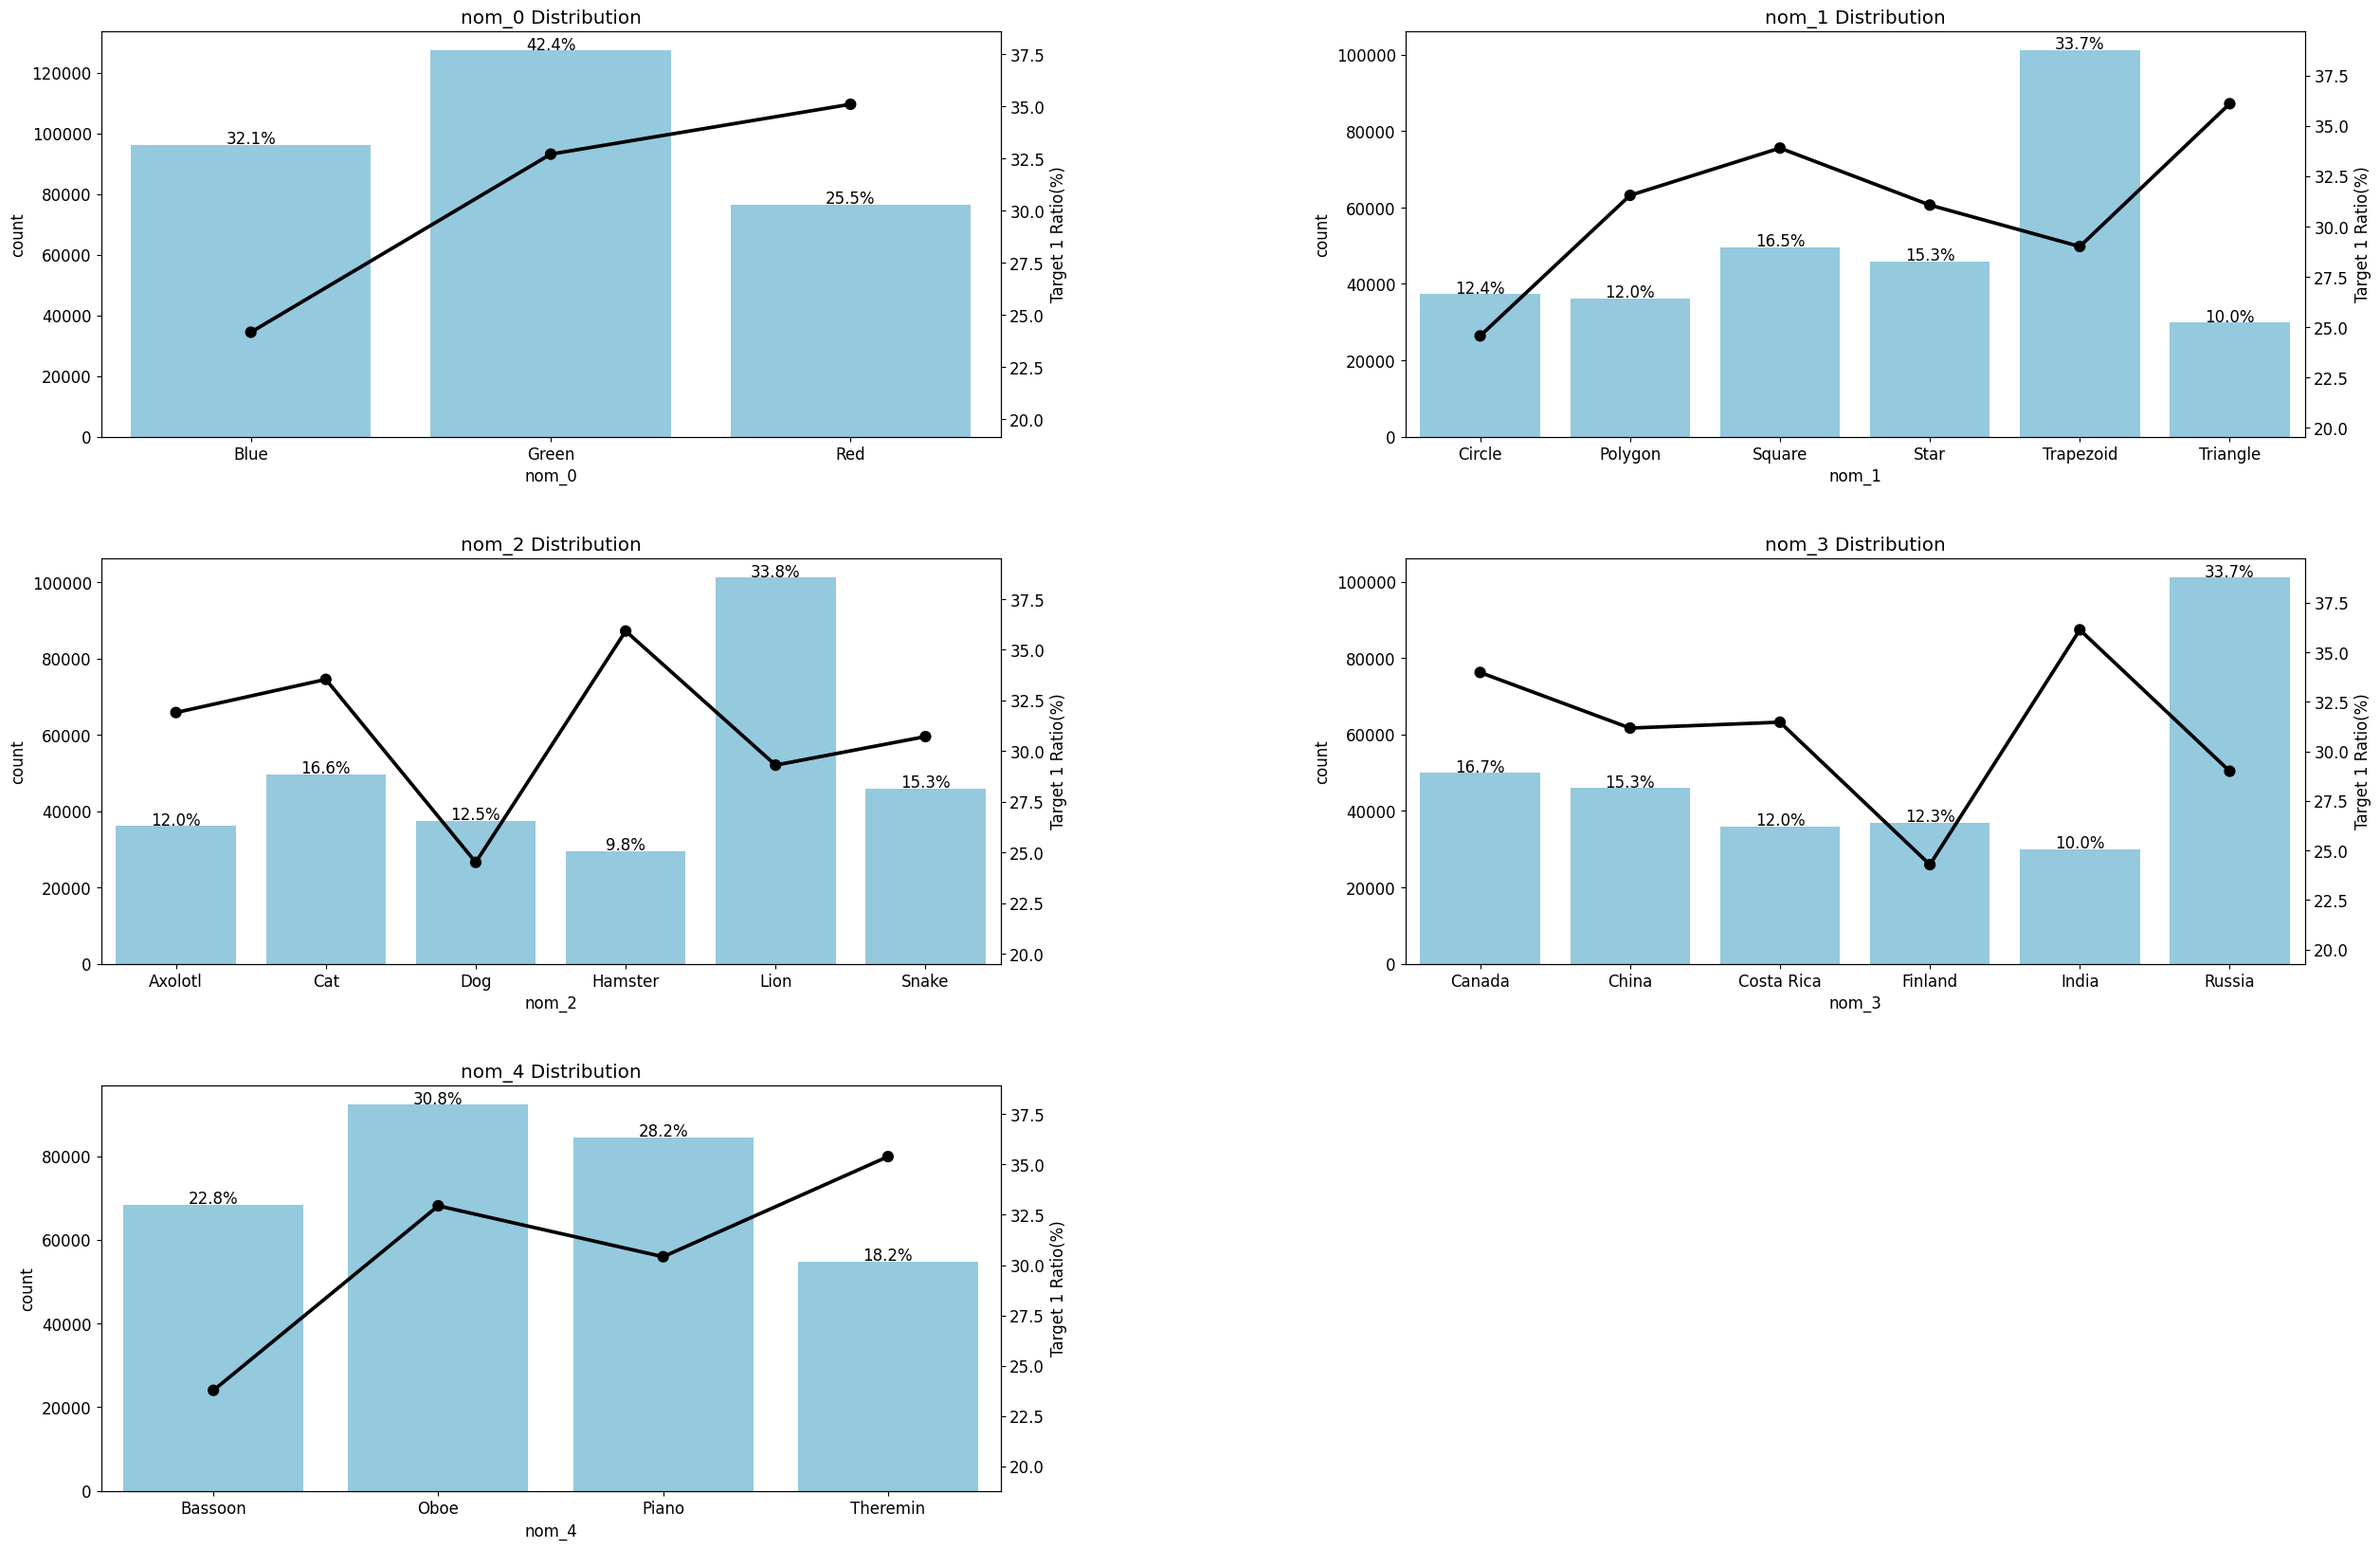

In [22]:
nom_features = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4']
plot_cat_dist_with_true_ratio(train, nom_features, num_cols=2, num_rows=3)

- INTERPRATATION
  - Among the corresponding unique values of each featrues, the distributions(ratio of 1 to the target value) are different, so the features have predictive ability for the target value.
  - `NOMIAL, DATE DATA`: ONE HOT ENCODING(5.3.2 CH)
    - WHEN? 
      - Neglict Orinarity & Small number of unique values
  - `ORDINAL DATA`: If it's not encoded as number, then Ordinarity should be considered.
  - `Cyclical DATA` like DATE: Triangular function ENCODING
    - WHEN? Cyclical Data


## Target Distribution According to Ordinal Features

In [19]:
from pandas.api.types import CategoricalDtype

ord_1_value = ['Novice','Contributor','Expert','Master','Grandmaster']
ord_2_value = ['Freezing','Cold','Warm','Hot','Boiling Hot','Lava Hot']

ord_1_dtype = CategoricalDtype(categories=ord_1_value, ordered=True)
ord_2_dtype = CategoricalDtype(categories=ord_2_value, ordered=True)

train['ord_1'] = train['ord_1'].astype(ord_1_dtype)
train['ord_2'] = train['ord_2'].astype(ord_2_dtype)

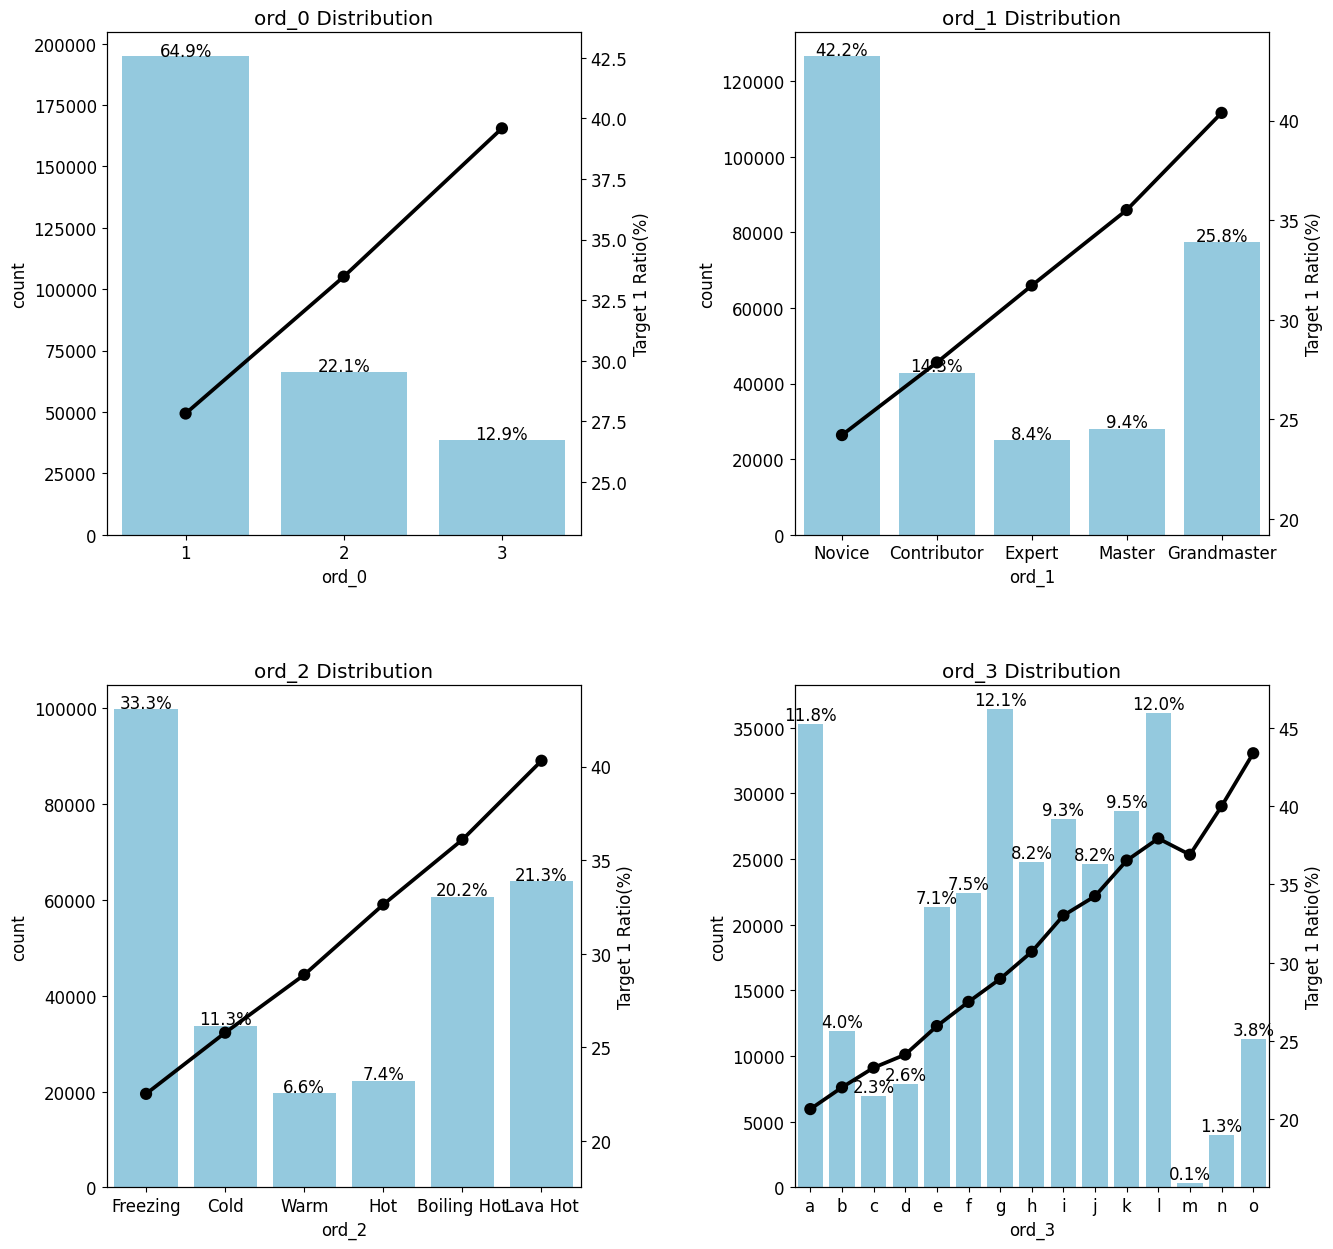

In [23]:
ord_features = ['ord_0', 'ord_1', 'ord_2', 'ord_3']
plot_cat_dist_with_true_ratio(
    train
    , ord_features
    , num_rows = 2
    , num_cols = 2
    , size = (15, 15)
)

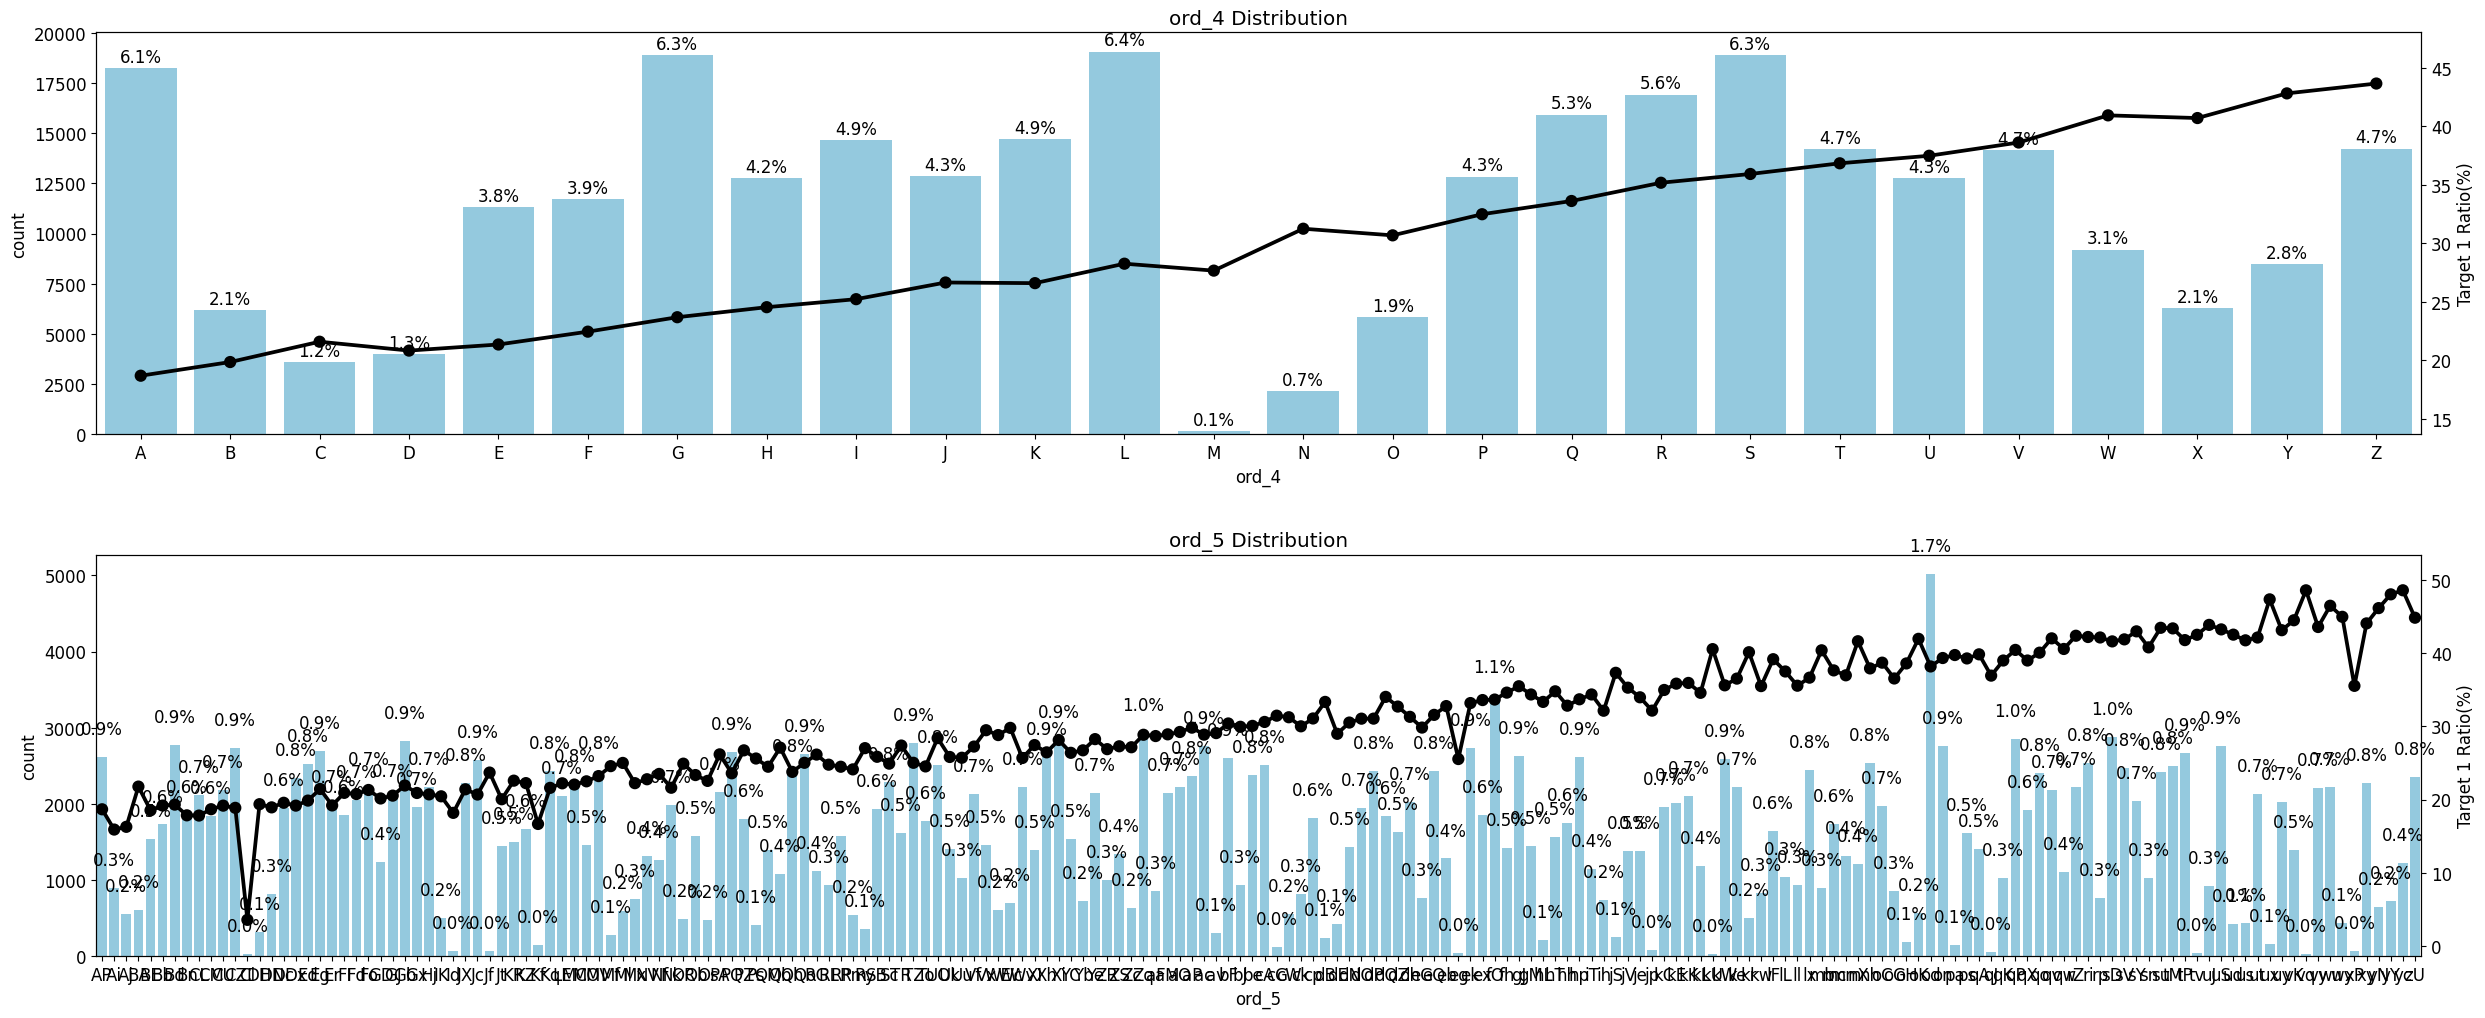

In [24]:
plot_cat_dist_with_true_ratio(
    train
    , ['ord_4', 'ord_5']
    , num_rows=2
    , num_cols=1
    , size = (30, 12)
)

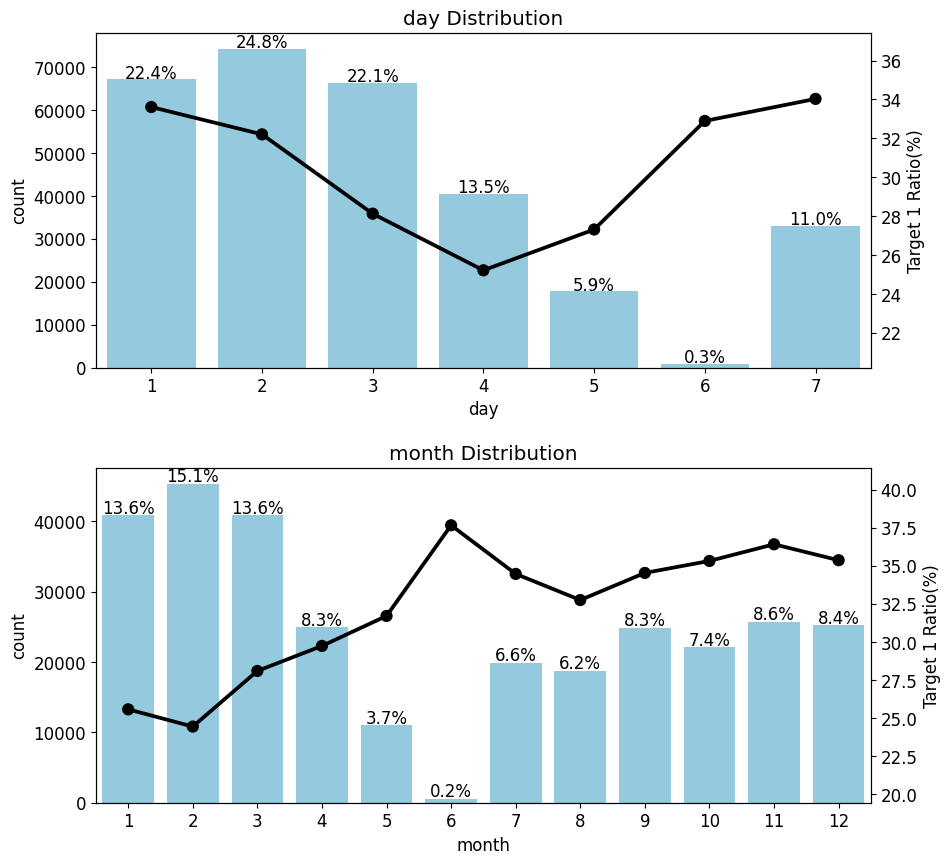

In [25]:
date_features = ['day', 'month']
plot_cat_dist_with_true_ratio(
    train
    , date_features
    , num_rows = 2
    , num_cols = 1
    , size = (10, 10)
)

- DAY2 CONCLUSION
- INTERPRATATION
  - Among the corresponding unique values of each featrues, the distributions(ratio of 1 to the target value) are different, **so the features have predictive ability for the target value.**
  - `NOMIAL, DATE DATA`: ONE HOT ENCODING(5.3.2 CH)
    - WHEN? 
      - Neglict Orinarity & Small number of unique values
  - `ORDINAL DATA`: If it's not encoded as number, then Ordinarity should be considered.
  - `Cyclical DATA` like DATE: Trigonometric function ENCODING
    - WHEN? Cyclical Data


# MODELS

## BaseLine Model
- Day 3 Started
- Data Load → FE → Model Learning → Evaluation

In [30]:
all_data = pd.concat([train, test])
all_data = all_data.drop('target', axis = 1)
all_data

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0,0,0,F,N,Green,Square,Lion,Canada,Theremin,...,9e4b23160,acc31291f,1,Novice,Lava Hot,j,A,Gb,1,3
499996,1,0,0,F,Y,Green,Trapezoid,Lion,China,Piano,...,cfbd87ed0,eae3446d0,1,Contributor,Lava Hot,f,S,Ed,2,2
499997,0,1,1,T,Y,Green,Trapezoid,Lion,Canada,Oboe,...,1108bcd6c,33dd3cf4b,1,Novice,Boiling Hot,g,V,TR,3,1


- Encoding Features
![Image](2023-01-11-23-07-56.png)

In [31]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
all_data_encoded = encoder.fit_transform(all_data)

In [43]:
num_train = len(train)
X_train = all_data_encoded[:num_train]
X_test = all_data_encoded[num_train:]
y = train['target']

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
                                                        X_train
                                                        , y
                                                        , test_size = 0.1
                                                        , stratify=y # The target value y is distributed into the training data and validation data by equal proportions.
                                                        , random_state=42
                                                        )

In [37]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)
y_valid_preds = logistic_model.predict_proba(X_valid)[:, 1]

from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_valid, y_valid_preds)
print(f'validation data roc auc:{roc_auc:.4f}')

y_preds = logistic_model.predict_proba(X_test)[:, 1]
submission['target'] = y_preds
submission.to_csv('submussion.csv')

validation data roc auc:0.7957


## Improved Model 1
- My purpose of improvement is to improve the performance of this model by properly handling the data
- Data Load → FE → Model Learning → Evaluation
    - FE1: feature customed encoding
    - FE2: feature scaling
    - Model Learning: Optimization hyperparameter

### Feature Customed Encoding
![](2023-01-11-23-25-57.png)

In [32]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

all_data = pd.concat([train, test])
all_data = all_data.drop('target', axis = 1)

#binary features encoding
all_data['bin_3'] = all_data['bin_3'].map({'F':0, 'T':1}) 
all_data['bin_4'] = all_data['bin_4'].map({'N':0, 'Y':1})
#ordinal features encoding
ord1dict = {'Novice':0,'Contributor':1,'Expert':2,'Master':3,'Grandmaster':4}
ord2dict = {'Freezing':0,'Cold':1,'Warm':2,'Hot':3,'Boiling Hot':4,'Lava Hot':5}
all_data['ord_1'] = all_data['ord_1'].map(ord1dict)
all_data['ord_2'] = all_data['ord_2'].map(ord2dict)

ord_345 = ['ord_3','ord_4','ord_5']
ord_encoder = OrdinalEncoder()
all_data[ord_345] = ord_encoder.fit_transform(all_data[ord_345])
# for feature, categories in zip(ord_345, ord_encoder.categories_):
#     print(feature)
#     print(categories)

#nomial featrues encoding
nom_features = ['nom_' + str(i) for i in range(10)]
onehot_encoder = OneHotEncoder()
encoded_nom_matrix = onehot_encoder.fit_transform(all_data[nom_features])
all_data = all_data.drop(nom_features, axis=1)

#date featrues encoding
date_features = ['day', 'month']
encoded_date_matrix = onehot_encoder.fit_transform(all_data[date_features])
all_data = all_data.drop(date_features, axis=1)

In [33]:
#Scaling of Ordinal Features
from sklearn.preprocessing import MinMaxScaler

ord_features = ['ord_'+str(i) for i in range(6)]
all_data[ord_features] = MinMaxScaler().fit_transform(all_data[ord_features])

In [34]:
#data stack
from scipy import sparse

all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data)
                                , encoded_nom_matrix
                                , encoded_date_matrix]
                                , format='csr')

In [35]:
num_train = len(train)
X_train = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]
y = train['target']

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
                                                        X_train
                                                        , y
                                                        , test_size = 0.1
                                                        , stratify=y # The target value y is distributed into the training data and validation data by equal proportions.
                                                        , random_state=42
                                                        )

In [38]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

logistic_model = LogisticRegression()
lr_params = {
    'C': [0.1, 0.125, 0.2]
    ,'max_iter': [800, 900, 1000]
    ,'solver': ['liblinear']
    ,'random_state': [42]
}
gridsearch_logistic_model = GridSearchCV(
    estimator = logistic_model
    , param_grid = lr_params
    , scoring ='roc_auc'
    , cv = 5
)
gridsearch_logistic_model.fit(X_train, y_train)

print(f'Optimized Hyper Parameter:{gridsearch_logistic_model.best_params_}')

y_valid_preds = gridsearch_logistic_model.best_estimator_.predict_proba(X_valid)[:, 1]
roc_auc = roc_auc_score(y_valid, y_valid_preds)
print(f'validation data roc auc:{roc_auc:.4f}')

y_preds = gridsearch_logistic_model.best_estimator_.predict_proba(X_test)[:,1]
submission['target'] = y_preds
# submission.to_csv('submission.csv')

validation data roc auc:0.7957
CPU times: user 23.7 ms, sys: 1.27 ms, total: 25 ms
Wall time: 23.4 ms


In [39]:
submission

,target
id,
300000,0.364434
300001,0.710008
300002,0.126099
300003,0.479088
300004,0.863573
...,...
499995,0.270294
499996,0.130559
499997,0.315462


- Day 3 CLOSED / CONCLUSION
  - Feature Customed Encoding! / Scaling / CV

## Improved Model 2

- Day 4 STARTED


In [40]:
num_train = len(train)
X_train = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]
y = train['target']

In [43]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

logistic_model = LogisticRegression()
lr_params = {
    'C': [0.1, 0.125, 0.2]
    ,'max_iter': [800, 900, 1000]
    ,'solver': ['liblinear']
    ,'random_state': [42]
}
gridsearch_logistic_model = GridSearchCV(
    estimator = logistic_model
    , param_grid = lr_params
    , scoring ='roc_auc'
    , cv = 5
)
gridsearch_logistic_model.fit(X_train, y)

print(f'Optimized Hyper Parameter:{gridsearch_logistic_model.best_params_}')

# y_valid_preds = gridsearch_logistic_model.best_estimator_.predict_proba(X_valid)[:, 1]
# roc_auc = roc_auc_score(y_valid, y_valid_preds)
# print(f'validation data roc auc:{roc_auc:.4f}')

y_preds = gridsearch_logistic_model.best_estimator_.predict_proba(X_test)[:,1]
submission['target'] = y_preds
submission.to_csv('submission.csv')

Optimized Hyper Parameter:{'C': 0.125, 'max_iter': 800, 'random_state': 42, 'solver': 'liblinear'}
CPU times: user 3min 5s, sys: 2min 46s, total: 5min 51s
Wall time: 2min 4s


# SUMMARY
- DATA WRANGLING
- WHOLE TRAIN DATA → TRAIN_TEST_SPLIT() → MODEL (A, B, C, ... ) with TRAIN / EVALUATION with VALIDATION → MODEL C with WHOLE TRAIN DATA

# PRACTICE
1. resumetable with bike sharing demand data
2. go challenging https://www.kaggle.com/c/cat-in-the-dat-ii

# TASK CLOSED.